# Machine Learning for Time Series
### Notebook: Exploring Financial Time Series Data

In this notebook, we will learn how to **load, inspect, and visualize real-world financial time series data**.
We will use the `yfinance` Python package to fetch stock prices directly from Yahoo! Finance.

By the end of this notebook, you should be able to:
- Import financial data into a `pandas` DataFrame.
- Inspect the structure of the dataset (dates, columns, missing values).
- Visualize raw stock prices over time.
- Apply **rolling averages** to smooth short-term fluctuations.
- Understand why we analyze **returns** (simple and log) instead of raw prices.

---

**Reminder**:
- Run the code cells in order (top to bottom).
- If you are running this notebook in **Google Colab**, make sure to install any missing packages (e.g., `yfinance`) by running:

```python
%pip install yfinance

In [1]:
!pip install yfinance reportlab pandas

### Loading Financial Data with `yfinance`

We will use the [`yfinance`](https://pypi.org/project/yfinance/) package to download Google’s historical stock prices directly from Yahoo! Finance.

- `yf.download("GOOG", ...)` retrieves daily stock data for the ticker `GOOG`.
- We specify a start and end date to restrict the time period.
- By default, `yfinance` may return a **MultiIndex** when multiple tickers are downloaded, so we flatten the columns for simplicity.
- Finally, we inspect the dataset using `df.head()` to check the first few rows.

In [2]:
import yfinance as yf
import io

# Download Google's stock price history (raw values, not auto-adjusted)
df = yf.download("GOOG", start="2020-01-01", end="2023-12-31", auto_adjust=False)

# Flatten column names (avoid MultiIndex)
df.columns = [col[0] for col in df.columns]

# Display first rows
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,67.964508,68.368500,68.406998,67.077499,67.077499,28132000
2020-01-03,67.630997,68.032997,68.625000,67.277199,67.392998,23728000
2020-01-06,69.298584,69.710503,69.824997,67.500000,67.500000,34646000
2020-01-07,69.255333,69.667000,70.149498,69.518997,69.897003,30054000
2020-01-08,69.801094,70.216003,70.579002,69.542000,69.603996,30560000


### Interpretation

- The dataset is stored as a `pandas.DataFrame` with a **DatetimeIndex** (each row is a trading day).
- Main columns:
  - **Open** – price at the start of the trading day
  - **High** – highest price during the day
  - **Low** – lowest price during the day
  - **Close** – price at the end of the trading day
  - **Adj Close** – *adjusted closing price*, corrected for dividends and stock splits (better for return calculations)
  - **Volume** – number of shares traded that day
- We now have a clean dataset that is ready for **visualization** and **analysis**.

Next, we will plot the **closing price** over time to explore overall trends.

### Visualizing Stock Prices

Before analyzing returns, it is helpful to look at the **raw closing price series**.
Visualization allows us to see overall trends, growth, and volatility over time.

Below we plot Google's closing stock price from 2020–2023.

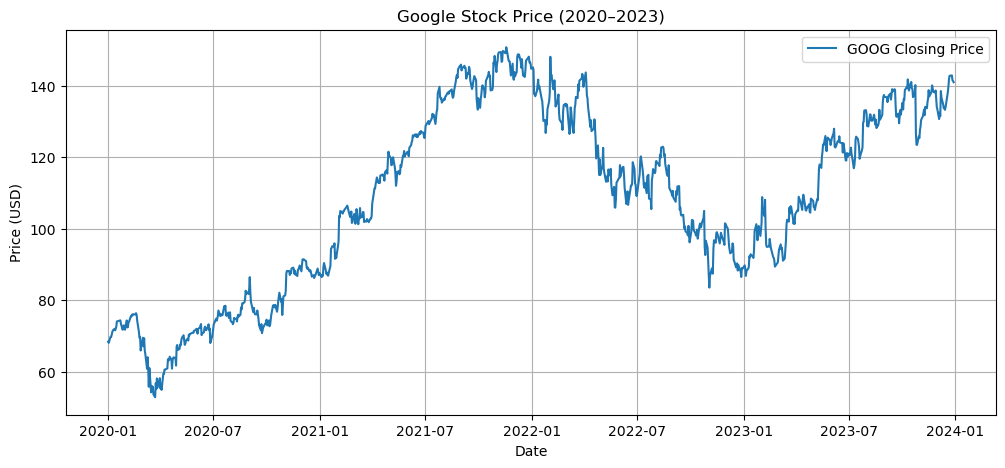

In [3]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"], label="GOOG Closing Price")

plt.title("Google Stock Price (2020–2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

- The stock price appears to **trend upward**, but with clear **short-term fluctuations**.
- Notice periods of **rapid growth** and **sharp declines** (volatility).
- While this plot is informative, the raw price is **non-stationary** — it drifts and changes scale over time.

To perform meaningful statistical modeling, we often transform prices into **returns** (simple or log returns), which are closer to stationary.

### Rolling Averages

Stock prices are noisy and fluctuate daily.
A **rolling average** (or moving average) smooths out short-term noise by averaging values over a fixed window.

Here we use a **30-day rolling average** to highlight the medium-term trend of Google's stock price.

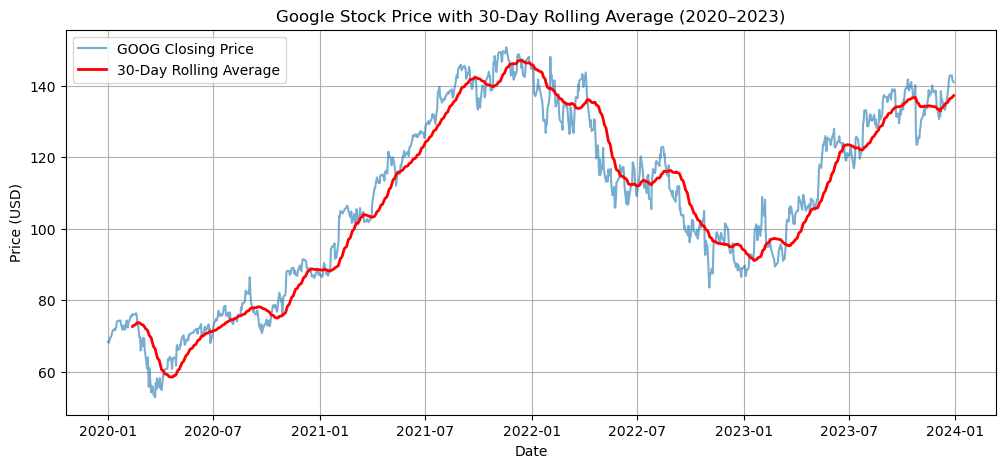

In [4]:
import matplotlib.pyplot as plt

# Plot closing price with 30-day rolling average
plt.figure(figsize=(12, 5))

# Plot the original closing price (transparent so the average stands out)
plt.plot(df.index, df["Close"], label="GOOG Closing Price", alpha=0.6)

# Compute and plot the 30-day rolling average
plt.plot(df.index,
         df["Close"].rolling(window=30).mean(),
         label="30-Day Rolling Average",
         linewidth=2,
         color="red")

# Add titles, labels, and formatting
plt.title("Google Stock Price with 30-Day Rolling Average (2020–2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

- The **blue line** shows the raw closing price (daily fluctuations).
- The **red line** shows the 30-day rolling mean, which smooths the series.

Notice how the rolling average filters out short-term volatility and reveals longer-term **trends** in the stock price.
This is often the first step before moving into **returns** analysis (log returns) to study stationarity and volatility patterns.

### Why analyze *returns* instead of prices?

- **Prices are non-stationary**: they drift and their variance changes over time, which complicates modeling.
- **Returns** measure *relative* changes and are often closer to stationary.

Two common definitions for a price series $ \{P_t\} $:

- **Simple return**: $ r_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1 $
- **Log return**: $ g_t = \log P_t - \log P_{t-1} = \log(1 + r_t) $

**Why log returns?**
- **Additivity** under compounding: sums of log returns over $k$ periods equal the log of the total price ratio.
- **Small-return approximation**: for daily data, $ \log(1+r_t) \approx r_t $.
- Tend to stabilize variance and treat up/down moves more symmetrically.

In [11]:
import numpy as np
import pandas as pd

# 1) Choose an appropriate price column.
# If you downloaded with auto_adjust=False, prefer 'Adj Close' if available.
price_col = "Adj Close" if "Adj Close" in df.columns else "Close"
price = df[price_col].astype(float).dropna()

# 2) Compute simple (%) returns and log returns.
simple_ret = price.pct_change().dropna()
log_ret    = np.log(price).diff().dropna()

### Visualize daily log returns

Daily log returns often look much more stationary than the raw price series.
We’ll plot them to see the *volatility* (varying amplitude) and mean-reverting behavior.

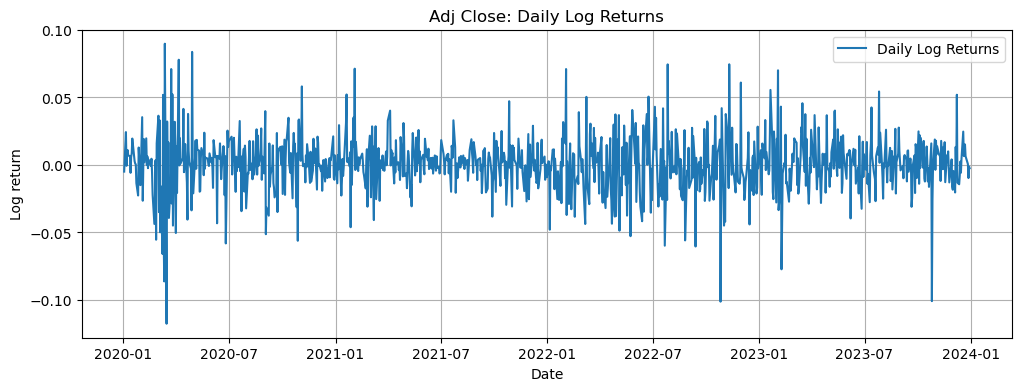

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(log_ret.index, log_ret, label="Daily Log Returns")
plt.title(f"{price_col}: Daily Log Returns")
plt.xlabel("Date"); plt.ylabel("Log return")
plt.legend(); plt.grid(True); plt.show()

### Distribution of returns

Financial returns are typically heavy-tailed (more extreme values than a Gaussian).
A histogram helps students see this visually.

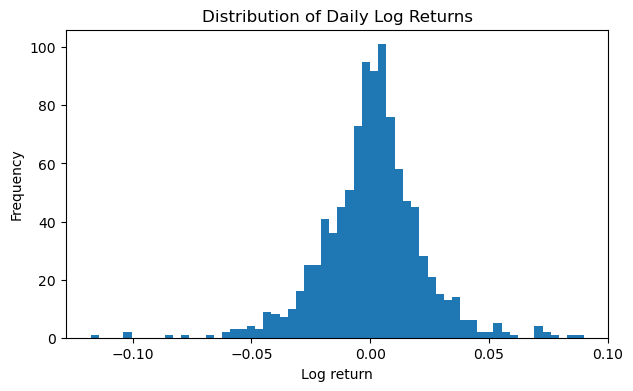

In [7]:
plt.figure(figsize=(7, 4))
plt.hist(log_ret, bins=60)
plt.title("Distribution of Daily Log Returns")
plt.xlabel("Log return"); plt.ylabel("Frequency")
plt.show()

### Simple vs. log returns: how different?

For small daily changes, $ \log(1+r_t) \approx r_t $.
Let’s quantify the difference between simple and log returns.

In [8]:
# Align indexes (in case of any mismatch after dropna)
aligned = pd.concat([simple_ret, log_ret], axis=1, keys=["simple", "log"]).dropna()
diff = (aligned["simple"] - aligned["log"]).abs()

print("Median |simple - log|:", diff.median())
print("95th percentile |simple - log|:", diff.quantile(0.95))

Median |simple - log|: 5.998321232647541e-05
95th percentile |simple - log|: 0.0009216353113082442


### Cumulative log return ≈ log of price ratio

Because log returns are additive:
$$
\sum_{j=1}^k g_{t-j+1} \;=\; \log\!\left(\frac{P_t}{P_{t-k}}\right).
$$
So the **cumulative sum** of log returns tracks the change in $\log P_t$ over time.

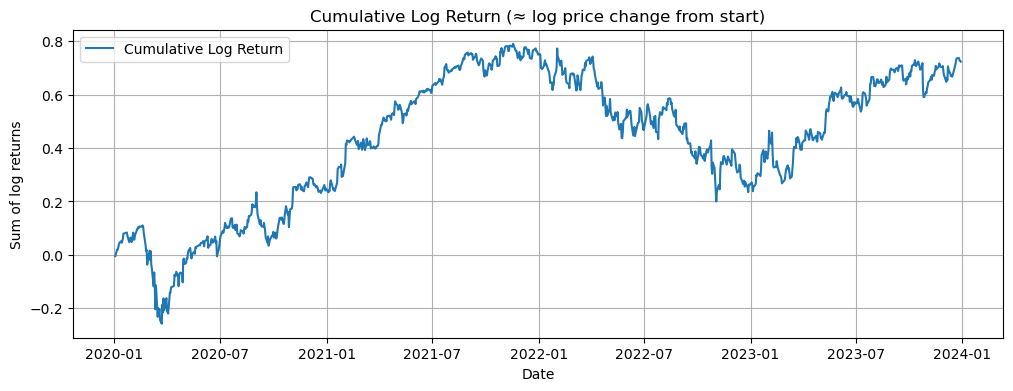

In [9]:
cum_log = log_ret.cumsum()

plt.figure(figsize=(12, 4))
plt.plot(cum_log.index, cum_log, label="Cumulative Log Return")
plt.title("Cumulative Log Return (≈ log price change from start)")
plt.xlabel("Date"); plt.ylabel("Sum of log returns")
plt.legend(); plt.grid(True); plt.show()

### Takeaways

- Prices are hard to model directly; **returns** (especially **log returns**) are more tractable.
- **Log returns add** across time (nice for multi-period analysis and forecasting).
- For daily horizons, **simple and log returns are numerically very close**, but log returns compose cleanly.